# Minimal example with TensorFlow 2.0

TensorFlow is a deep learning library, developed by Google, that allows us to create fairly complicated models with little coding.

In this notebook we will create our machine learning algorithm using TF2.0

To train an ML Algorithm we need:
1. Data
2. Model
3. Objective function
4. Optimization algorithm

### Import the relevent libraries

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [5]:
## Checking TensorFlow version
tf.__version__

'2.0.0-alpha0'

`DATA`
### Data generation

In [7]:
observations = 1000

xs = np.random.uniform(low=-10,high=10,size=(observations,1))
zs = np.random.uniform(low=-10,high=10,size=(observations,1))

generated_inputs = np.column_stack((xs,zs))

noise = np.random.uniform(-1,1,(observations,1))

generated_targets = 2*xs - 3*zs + 5 +noise

np.savez('TF_intro', inputs=generated_inputs, targets=generated_targets)

### Solving with TensorFlow

In [9]:
training_data = np.load('TF_intro.npz')

`Model`

### Notes

    0. Link for [TF2.0 api docs](https://www.tensorflow.org/versions/r2.0/api_docs/python/tf)
    
    1. tf.keras.Sequesntial() function that specifies how the model will be laid down ('stacks layes')
    
> output = np.dot(inputs, weights)+bias`

    2. tf.keras.layers.Dense(output size) takes the inputs provided to the model and calculate the dot product of the input and the weights and adds the bias *also applies activateion function (optional)

> #### Objective function and Optimization algorithm

    3. model.compile(optimizer, loss) configures the model for training : help in specify 
> SGD = Stochastic Gradient Descent
   
    4. model.fit(inputs, targets) fits (trains) the model

    5. Each iteration over the full dataset is call epoch
        
> Epoch = iteration over the full dataset
 
     6. verbose=0, stands for 'silent'<br>
        verbose=1, stands for 'progress bar'<br>
        verbose=2, stands for 'one line per epoch'
  
    7. model.predict_on_batch(data) calculates the output given inputs

In [14]:
# Using default values for weights, baises and learning rate

input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size)
])

model.compile(optimizer="sgd", loss='mean_squared_error')
model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
1000/1000 - 0s - loss: 130.3634
Epoch 2/100
1000/1000 - 0s - loss: 22.6178
Epoch 3/100
1000/1000 - 0s - loss: 18.7657
Epoch 4/100
1000/1000 - 0s - loss: 16.5064
Epoch 5/100
1000/1000 - 0s - loss: 14.5592
Epoch 6/100
1000/1000 - 0s - loss: 12.8544
Epoch 7/100
1000/1000 - 0s - loss: 11.3265
Epoch 8/100
1000/1000 - 0s - loss: 10.0259
Epoch 9/100
1000/1000 - 0s - loss: 8.8738
Epoch 10/100
1000/1000 - 0s - loss: 7.8286
Epoch 11/100
1000/1000 - 0s - loss: 6.9210
Epoch 12/100
1000/1000 - 0s - loss: 6.1317
Epoch 13/100
1000/1000 - 0s - loss: 5.4456
Epoch 14/100
1000/1000 - 0s - loss: 4.8219
Epoch 15/100
1000/1000 - 0s - loss: 4.2780
Epoch 16/100
1000/1000 - 0s - loss: 3.8031
Epoch 17/100
1000/1000 - 0s - loss: 3.3862
Epoch 18/100
1000/1000 - 0s - loss: 3.0134
Epoch 19/100
1000/1000 - 0s - loss: 2.6954
Epoch 20/100
1000/1000 - 0s - loss: 2.4108
Epoch 21/100
1000/1000 - 0s - loss: 2.1571
Epoch 22/100
1000/1000 - 0s - loss: 1.9378
Epoch 23/100
1000/1000 - 0s - loss: 1.7448
Epoch 24/10

In [23]:
# Using defined for weights, baises and learning rate as did in old version
# weights are called kernel in TF2.0

input_size = 2
output_size = 1

model = tf.keras.Sequential([
    tf.keras.layers.Dense(output_size,
                         kernel_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1),
                         bias_initializer=tf.random_uniform_initializer(minval=-0.1, maxval=0.1))
])

custom_optimizer = tf.keras.optimizers.SGD(learning_rate=0.02)

model.compile(optimizer="sgd", loss='mean_squared_error')

model.fit(training_data['inputs'], training_data['targets'], epochs=100, verbose=2)

Epoch 1/100
1000/1000 - 0s - loss: 129.1870
Epoch 2/100
1000/1000 - 0s - loss: 23.1767
Epoch 3/100
1000/1000 - 0s - loss: 19.0562
Epoch 4/100
1000/1000 - 0s - loss: 16.7320
Epoch 5/100
1000/1000 - 0s - loss: 14.7773
Epoch 6/100
1000/1000 - 0s - loss: 13.0339
Epoch 7/100
1000/1000 - 0s - loss: 11.5372
Epoch 8/100
1000/1000 - 0s - loss: 10.1813
Epoch 9/100
1000/1000 - 0s - loss: 8.9973
Epoch 10/100
1000/1000 - 0s - loss: 7.9543
Epoch 11/100
1000/1000 - 0s - loss: 7.0420
Epoch 12/100
1000/1000 - 0s - loss: 6.2330
Epoch 13/100
1000/1000 - 0s - loss: 5.5199
Epoch 14/100
1000/1000 - 0s - loss: 4.8914
Epoch 15/100
1000/1000 - 0s - loss: 4.3426
Epoch 16/100
1000/1000 - 0s - loss: 3.8627
Epoch 17/100
1000/1000 - 0s - loss: 3.4378
Epoch 18/100
1000/1000 - 0s - loss: 3.0648
Epoch 19/100
1000/1000 - 0s - loss: 2.7358
Epoch 20/100
1000/1000 - 0s - loss: 2.4442
Epoch 21/100
1000/1000 - 0s - loss: 2.1878
Epoch 22/100
1000/1000 - 0s - loss: 1.9670
Epoch 23/100
1000/1000 - 0s - loss: 1.7685
Epoch 24/10

### Extract the  weights and bias

In [24]:
bais = model.layers[0].get_weights()
print(bais)

[array([[ 2.0062003],
       [-2.9986124]], dtype=float32), array([4.9783115], dtype=float32)]


### Extract the output (make predictions)

In [25]:
model.predict_on_batch(training_data['inputs']).round(1)

array([[ 36.1],
       [ 32.1],
       [  1.2],
       [ 10. ],
       [ 18. ],
       [ -7.4],
       [  9.1],
       [ 18.4],
       [ -0.5],
       [ 23.3],
       [-30.3],
       [ 38.3],
       [ 48.1],
       [ 15.3],
       [ 27.4],
       [ -3.6],
       [-37.1],
       [ 23.4],
       [  5.7],
       [ 32.1],
       [-21.7],
       [ -1.1],
       [ 26.9],
       [-28.1],
       [  2.9],
       [ 24.6],
       [ 31.8],
       [ -7.1],
       [  4.2],
       [  1.3],
       [ 23.7],
       [ -8.3],
       [  9.4],
       [ -2.1],
       [  2. ],
       [  2.5],
       [ 25.8],
       [  9.1],
       [ 38.6],
       [ -6.2],
       [ 18.6],
       [ 22.4],
       [  7.5],
       [ 10.5],
       [ 14.4],
       [ 19.1],
       [ -3.3],
       [ 32.2],
       [ 12.8],
       [-26.2],
       [-21.4],
       [ 21.9],
       [  1.9],
       [ 42.8],
       [ 39.8],
       [ 21.5],
       [ 12.9],
       [ 31.8],
       [ 31.3],
       [-31.6],
       [  5.9],
       [ 11.6],
       [

In [26]:
training_data['targets'].round(1)

array([[ 36.4],
       [ 32.6],
       [  1.5],
       [  9.7],
       [ 18.6],
       [ -6.7],
       [  8.5],
       [ 19.1],
       [ -1.2],
       [ 23.9],
       [-29.4],
       [ 39.1],
       [ 47.9],
       [ 14.8],
       [ 26.5],
       [ -3.3],
       [-36.4],
       [ 23.4],
       [  4.9],
       [ 31.7],
       [-21.6],
       [ -0.8],
       [ 27.9],
       [-28.6],
       [  2.1],
       [ 23.9],
       [ 32.7],
       [ -7.4],
       [  3.8],
       [  1.2],
       [ 23.6],
       [ -8.7],
       [  9. ],
       [ -1.9],
       [  2.9],
       [  1.9],
       [ 26.8],
       [  8.2],
       [ 38. ],
       [ -5.7],
       [ 17.7],
       [ 22.4],
       [  7.8],
       [ 10.7],
       [ 14.3],
       [ 19. ],
       [ -2.3],
       [ 32.3],
       [ 13.5],
       [-26.3],
       [-20.5],
       [ 22.3],
       [  2.5],
       [ 43.5],
       [ 40.1],
       [ 21.9],
       [ 14. ],
       [ 32.5],
       [ 31.5],
       [-31.1],
       [  6.9],
       [ 11.2],
       [

## Plotting the data

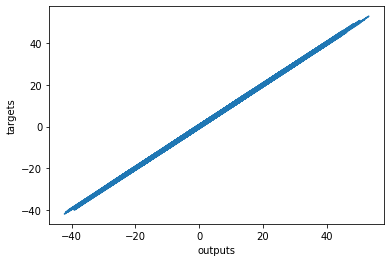

In [27]:
plt.plot(np.squeeze(model.predict_on_batch(training_data['inputs'])), np.squeeze(training_data['targets']))
plt.xlabel('outputs')
plt.ylabel('targets')
plt.show()

List of available optimizers in TF2.0

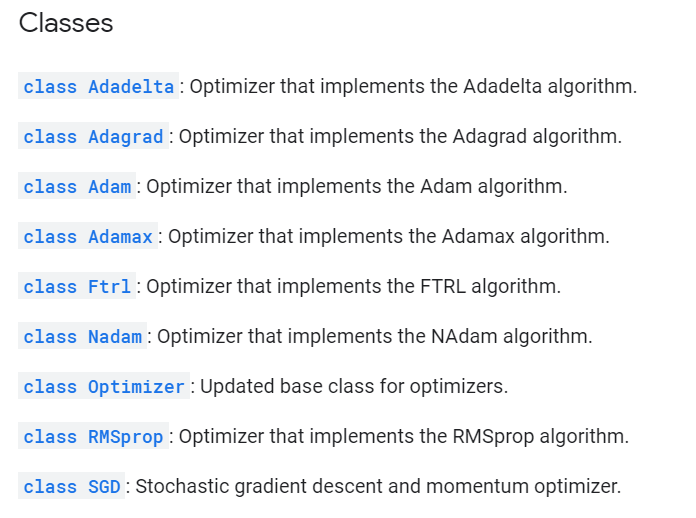

List of available losses functions

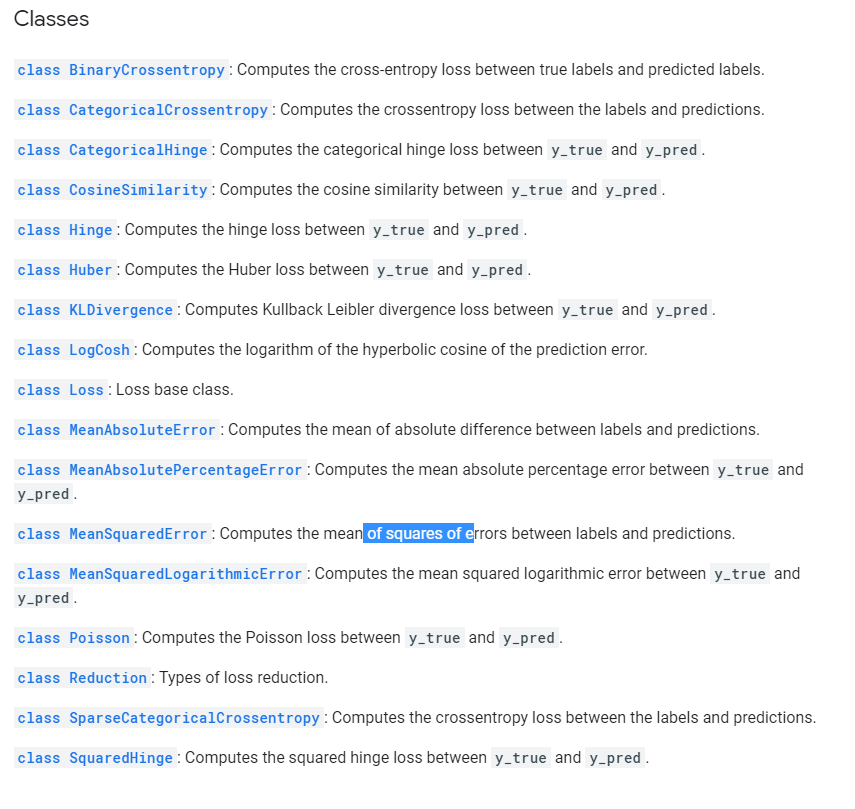